## Installs for colab

In [ ]:
!git clone https://github.com/zademn/PU-GCN-pytorch

In [ ]:
cd PU-GCN-pytorch/demo

In [ ]:
import os

import torch

os.environ["TORCH"] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [ ]:
!pip install omegaconf einops open3d

# Start

In [72]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch_geometric
from omegaconf import OmegaConf
from tqdm.notebook import tqdm

In [73]:
sys.path.append("..")

In [74]:
from pugcn_lib.models import PUGCN, JustUpsample
from utils.data import load_xyz_file
from utils.viz import draw_point_cloud


In [75]:
sorted(os.listdir("trained-models-examples/"))

['ju-baseline', 'pugcn-baseline', 'pugcn-baseline-alpha05']

## Utils

In [76]:
def plot_horizontal(pcds, titles, savefile=None, show=True, figsize=5):

    img_arr = [
        draw_point_cloud(data.numpy(), zrot=110 / 180.0 * np.pi, xrot=135 / 180.0 * np.pi, diameter=5) for data in pcds
    ]
    plt.figure(figsize=(figsize * len(titles), figsize))

    for i, (img, title) in enumerate(zip(img_arr, titles), start=1):
        plt.subplot(1, len(img_arr), i)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(title)

    if savefile is not None:
        plt.savefig(savefile)

    if show:
        plt.show()

# Demo

In [77]:
# Load 3 models

checkpoint = torch.load(os.path.join("trained-models-examples", "pugcn-baseline", "ckpt_epoch_10"), map_location = torch.device("cpu"))
model_config = checkpoint["experiment_config"]["model_config"]
model1 = PUGCN(**model_config)
model1.load_state_dict(checkpoint["model_state_dict"])

checkpoint = torch.load(os.path.join("trained-models-examples", "pugcn-baseline-alpha05", "ckpt_epoch_10"), map_location = torch.device("cpu"))
model_config = checkpoint["experiment_config"]["model_config"]
model2 = PUGCN(**model_config)
model2.load_state_dict(checkpoint["model_state_dict"])

checkpoint = torch.load(os.path.join("trained-models-examples", "ju-baseline", "ckpt_epoch_10"), map_location = torch.device("cpu"))
model_config = checkpoint["experiment_config"]["model_config"]
model3 = JustUpsample(**model_config)
model3.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [78]:
# Set dirs
input_dir = os.path.join("data", "inputs")
gt_dir = os.path.join("data", "gt")
file = "knife" + ".xyz"

# Load data
data = load_xyz_file(os.path.join(input_dir, file))
gt = load_xyz_file(os.path.join(gt_dir, file))

# Transform into tensor
data = torch.tensor(data, dtype=torch.float32)
gt = torch.tensor(gt, dtype=torch.float32)

In [79]:
# Prediction
out1 = model1(data).detach()
out2 = model2(data).detach()
out3 = model3(data).detach()

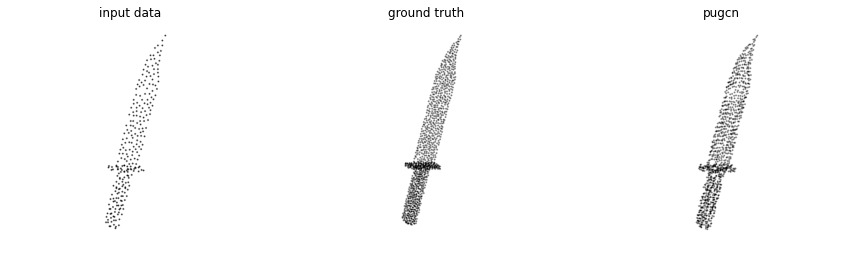

In [80]:
img_titles = ["input data", "ground truth", "pugcn"]
plot_horizontal([data, gt, out1], img_titles, show=True, savefile=None)

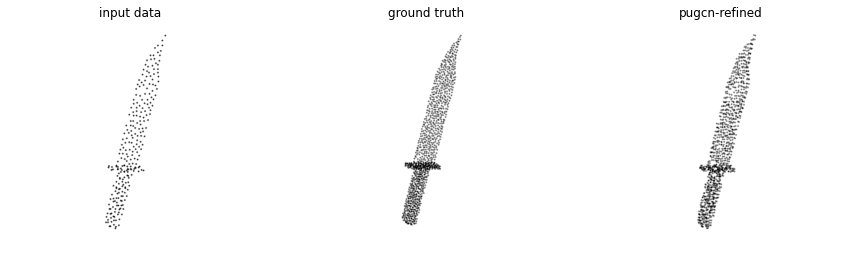

In [81]:
img_titles = ["input data", "ground truth", "pugcn-refined"]
plot_horizontal([data, gt, out2], img_titles, show=True, savefile=None)

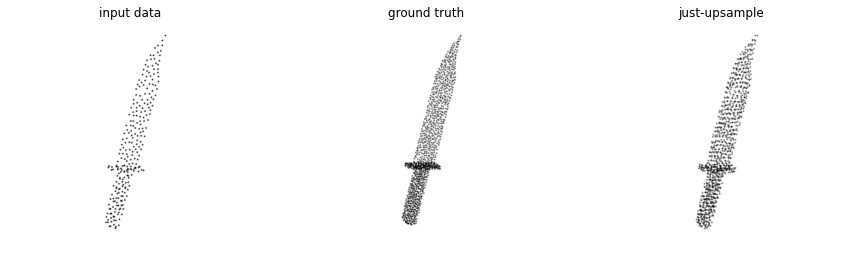

In [82]:
img_titles = ["input data", "ground truth", "just-upsample"]
plot_horizontal([data, gt, out3], img_titles, show=True, savefile=None)